# Henry Hub vs TTF Natural Gas Seasonality Analysis

## Project Objective
This project investigates the seasonal patterns of natural gas prices in the US and Europe using Henry Hub (HH) and TTF Europe (TTF) benchmark prices. The goal is to understand recurring monthly trends over the past 10 years and provide quantitative insights for trading, risk management, and market analysis.

The underlying hypothesis is that both markets exhibit distinct seasonality driven by weather, storage dynamics, and regional demand patterns. Comparing normalized seasonality allows for direct observation of relative price swings and peak/trough timing between the two benchmarks.

## Data & Instruments
Data is sourced from Yahoo Finance (via `yfinance`) and spans approximately 10 years of daily futures prices. The following instruments are analyzed:

- **Henry Hub (NG=F)** — Benchmark US natural gas price
- **TTF Europe (TTF=F)** — Benchmark European natural gas price

## Methodology:

### Data Preparation
- Daily closing prices for HH and TTF
- Extraction of month from each observation
- Grouping by month to compute 10-year average prices

### Seasonality Analysis
- Compute monthly averages to capture recurring seasonal trends
- Normalize each series to 0–1 for direct comparison of patterns
- Identify peak and trough months for each benchmark

### Visualization
- Line charts showing raw and normalized seasonality
- Annotated plots highlighting peak and trough months
- Normalized plots allow comparison of the shape and timing of seasonal trends, independent of absolute price levels

### Quantitative Insights
- Tabular summary of average monthly prices and normalized values
- Key observations: peak/trough months and absolute price spreads
- Analysis highlights differences in timing and magnitude of seasonal cycles between HH and TTF

## Context
Developed as part of an independent project in commodity market analysis. The analysis provides actionable insights for understanding global natural gas market dynamics.


# Housekeeping

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import yfinance as yf

# Data Gathering & Calculating Seasonality

In [4]:
def get_data(symbol, name):
    df = yf.download(symbol, auto_adjust=True, period="10y")
    df = df[['Close']].dropna()
    df['Month'] = df.index.month
    df['Benchmark'] = name
    return df

def calculate_seasonality(df):
    monthly_avg = df.groupby('Month')['Close'].mean()
    return monthly_avg.squeeze()  # ensures 1D Series


# Normalising Series, Plotting with Peaks and Troughs

In [5]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# --- 4. Plotting Normalized Seasonality ---
def plot_normalized_seasonality(hh_avg, ttf_avg):


    hh_values = hh_avg.values.flatten()
    ttf_values = ttf_avg.values.flatten()
    hh_norm = normalize(hh_values)
    ttf_norm = normalize(ttf_values)

    months = range(1, 13)

    plt.figure(figsize=(10,8))
    plt.plot(months, hh_norm, marker='o', color='tab:green', label='Henry Hub (normalized)')
    plt.plot(months, ttf_norm, marker='o', color='tab:blue', label='TTF (normalized)')


    for norm_series, color, name in [(hh_norm, 'tab:green', 'Henry Hub'),
                                     (ttf_norm, 'tab:blue', 'TTF')]:
        peak_idx = norm_series.argmax()
        trough_idx = norm_series.argmin()

        plt.scatter(months[peak_idx], norm_series[peak_idx], color=color, s=100, marker='^')
        plt.text(months[peak_idx], norm_series[peak_idx]+0.03,
                 f"Peak ({month_name(months[peak_idx])})", color=color,
                 ha='center')

        plt.scatter(months[trough_idx], norm_series[trough_idx], color=color, s=100, marker='v')
        plt.text(months[trough_idx], norm_series[trough_idx]-0.03,
                 f"Trough ({month_name(months[trough_idx])})", color=color,
                 ha='center')

    plt.title("Normalized Seasonality of Natural Gas Prices (10y Avg)")
    plt.xlabel("Month")
    plt.ylabel("Normalized Price (0–1)")
    plt.xticks(months, ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
    plt.legend()
    plt.grid(True)
    plt.show()


# Generating Analysis

In [6]:
def generate_insights(hh_avg, ttf_avg):

    hh_values = hh_avg.values.flatten()
    ttf_values = ttf_avg.values.flatten()
    hh_norm = normalize(hh_values)
    ttf_norm = normalize(ttf_values)

    months = range(1, 13)
    df = pd.DataFrame({
        "Month": months,
        "Henry_Hub": hh_values,
        "Henry_Hub_Normalized": hh_norm,
        "TTF": ttf_values,
        "TTF_Normalized": ttf_norm
    })

    # Peak and trough
    hh_peak_month = df.loc[df['Henry_Hub_Normalized'].idxmax(), 'Month']
    hh_trough_month = df.loc[df['Henry_Hub_Normalized'].idxmin(), 'Month']
    ttf_peak_month = df.loc[df['TTF_Normalized'].idxmax(), 'Month']
    ttf_trough_month = df.loc[df['TTF_Normalized'].idxmin(), 'Month']

    print("=== Analysis of Seasonality ===\n")
    print(df.round(3))
    print("\nKey Observations:")
    print(f"Henry Hub peaks in {month_name(hh_peak_month)}, troughs in {month_name(hh_trough_month)}")
    print(f"TTF peaks in {month_name(ttf_peak_month)}, troughs in {month_name(ttf_trough_month)}")
    print(f"Henry Hub spread (max-min): {hh_values.max()-hh_values.min():.2f}")
    print(f"TTF spread (max-min): {ttf_values.max()-ttf_values.min():.2f}")


def month_name(m):
    return ["Jan","Feb","Mar","Apr","May","Jun",
            "Jul","Aug","Sep","Oct","Nov","Dec"][m-1]

# Executing Code

In [ ]:
def main():
    HH_df = get_data("NG=F", "Henry Hub")
    TTF_df = get_data("TTF=F", "TTF Europe")
    hh_avg = calculate_seasonality(HH_df)
    ttf_avg = calculate_seasonality(TTF_df)
    plot_normalized_seasonality(hh_avg, ttf_avg)
    generate_insights(hh_avg, ttf_avg)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


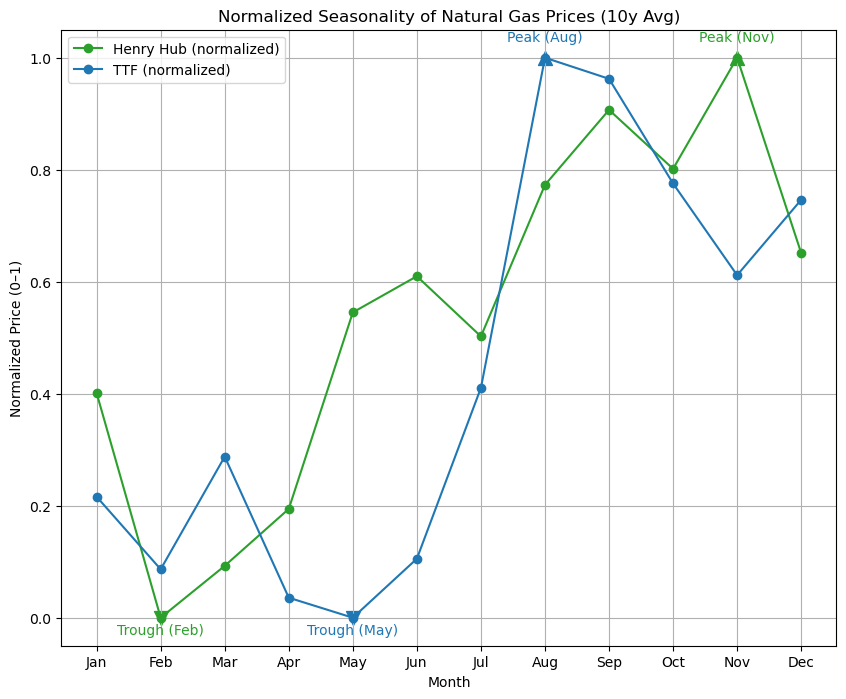

=== Analysis of Seasonality ===

    Month  Henry_Hub  Henry_Hub_Normalized     TTF  TTF_Normalized
0       1      3.061                 0.401  37.185           0.216
1       2      2.729                 0.000  34.257           0.086
2       3      2.806                 0.093  38.803           0.288
3       4      2.890                 0.194  33.111           0.036
4       5      3.181                 0.545  32.303           0.000
5       6      3.234                 0.610  34.684           0.105
6       7      3.145                 0.502  41.579           0.411
7       8      3.369                 0.773  54.898           1.000
8       9      3.480                 0.907  54.047           0.962
9      10      3.393                 0.802  49.823           0.775
10     11      3.558                 1.000  46.124           0.612
11     12      3.269                 0.651  49.166           0.746

Key Observations:
Henry Hub peaks in Nov, troughs in Feb
TTF peaks in Aug, troughs in May
Henry

In [8]:
main()